Kernel density estimates are closely related to histograms, but can be endowed with properties such as smoothness or continuity by using a suitable kernel.

In [24]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from distutils.version import LooseVersion
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

import os, sys, plotly.graph_objects as go
import plotly.figure_factory as ff
module_path = os.path.abspath(os.path.join('../../../../..'))
if module_path not in sys.path:
    sys.path.append(module_path) 

from sklearn.naive_bayes import GaussianNB
from sklearn import datasets 
from erudition.learning.modules.sklearn.GeneralizedLinearModels.helper import helper
from erudition.learning.helpers.plots.plotly_render import render, scatter

# `normed` is being deprecated in favor of `density` in histograms
if LooseVersion(matplotlib.__version__) >= '2.1':
    density_param = {'density': True}
else:
    density_param = {'normed': True}


 To see this, we compare the construction of histogram and kernel density estimators, using these 6 data points:

In [17]:
data = [-2.1, -1.3, -0.4, 1.9, 5.1, 6.2]

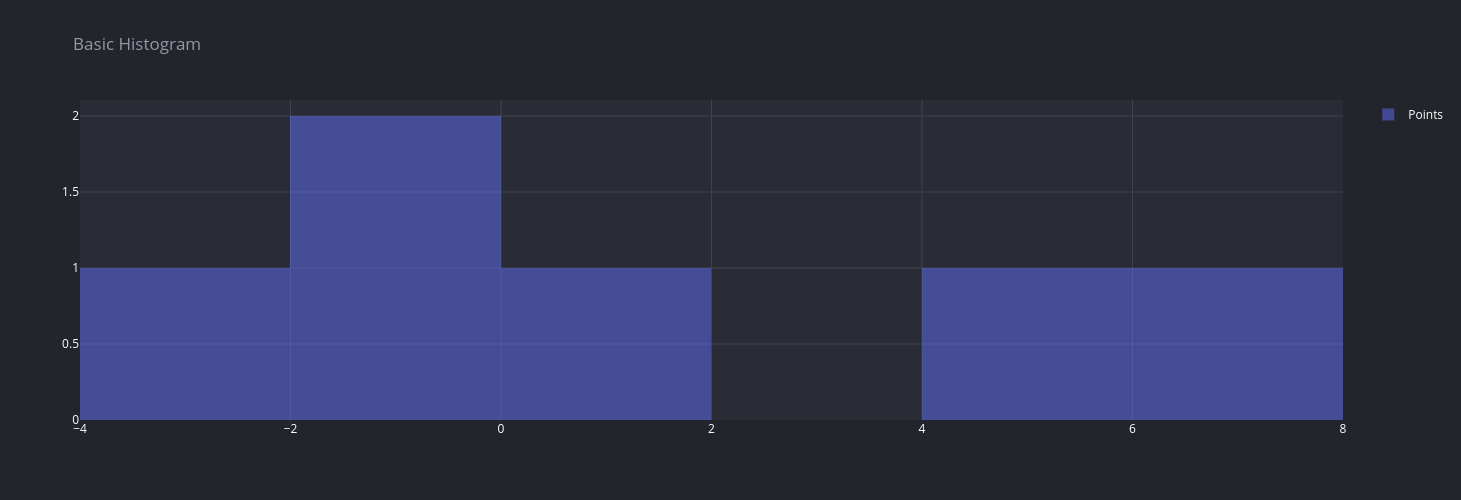

In [82]:
import plotly.graph_objects as go

import numpy as np
np.random.seed(1)

x = data

fig = go.Figure(data=[go.Histogram(x=x, opacity=0.5,  name='Points', xbins=dict(
                      start=-20,
                      end=10,
                      size= 2), autobinx = False)])
render(fig, title='Basic Histogram')

In [128]:
# Changing the bandwidth changes the shape of the kernel: a lower bandwidth means only points very 
# close to the current position are given any weight, which leads to the estimate 
# looking squiggly; a higher bandwidth means a shallow kernel where distant points can contribute.

kde = KernelDensity(kernel='gaussian', bandwidth=1.5).fit(np.array(data)[:, np.newaxis])

In [129]:
X_plot = np.linspace(-10, 10, 1000)[:, np.newaxis]
log_dens = kde.score_samples(X_plot)

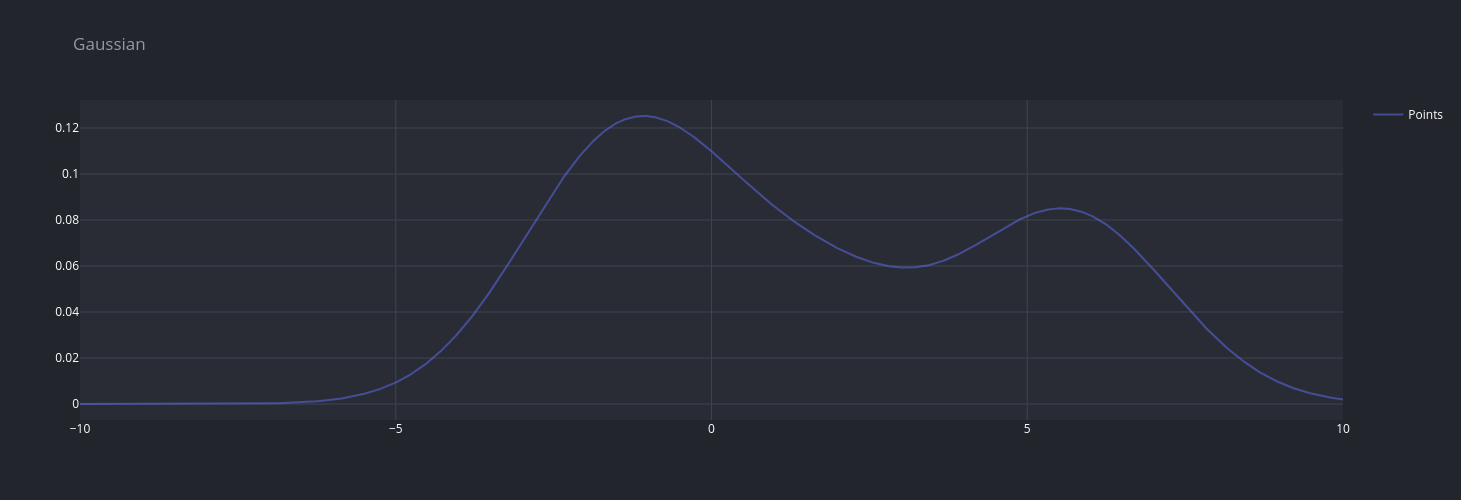

In [130]:
fig = go.Figure(scatter(X_plot[:,0], np.exp(log_dens), 'Points'))
render(fig, 'Gaussian')